### Import Library and Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data.csv")
df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Aaron King,46,7504.79,0,5.98,8,2007-05-13 20:42:11,"38346 Smith Prairie Arnoldside, MD 33861-4885",Hernandez PLC,0
1,Aaron Meyer,45,9598.03,0,5.00,7,2010-07-17 03:30:38,"35821 Bailey Skyway Alexisstad, NH 81472","Steele, Bates and Lane",0


In [6]:
# check null values
df.isna().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [7]:
# check sparsity and descriptive
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000
mean,41.850667,10055.878080,0.49200,5.301987,8.649333,0.194667
std,6.141552,2350.437004,0.50027,1.293987,1.808146,0.396208
min,22.000000,3263.000000,0.00000,1.000000,3.000000,0.000000
25%,38.000000,8520.490000,0.00000,4.470000,7.000000,0.000000
50%,41.000000,10045.870000,0.00000,5.270000,9.000000,0.000000
75%,46.000000,11752.855000,1.00000,6.167500,10.000000,0.000000
max,65.000000,18026.010000,1.00000,9.150000,14.000000,1.000000


In [8]:
df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Aaron King,46,7504.79,0,5.98,8,2007-05-13 20:42:11,"38346 Smith Prairie Arnoldside, MD 33861-4885",Hernandez PLC,0
1,Aaron Meyer,45,9598.03,0,5.00,7,2010-07-17 03:30:38,"35821 Bailey Skyway Alexisstad, NH 81472","Steele, Bates and Lane",0


In [9]:
# Drop unused columns
df["Company"].nunique() #drop coloumns due to unique data
df["Location"].nunique() #drop coloumns due to unique data
df["Names"].nunique() #drop coloumns due to unique data

df.drop(["Company","Location","Names"], axis=1, inplace=True)

In [10]:
df["Onboard_date"] = df["Onboard_date"].apply(lambda x:int(x[:4])) #takes only year date

### EDA

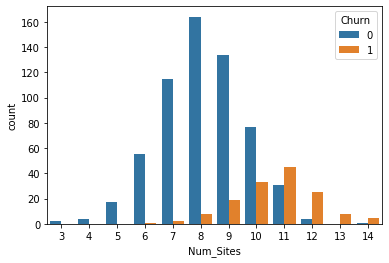

In [11]:
sns.countplot("Num_Sites",hue="Churn",data=df)  #its dificult to find insight from data because data has imbalance target

- overall site number 8 has low churn rate value
- site number 11 has high churn rate value

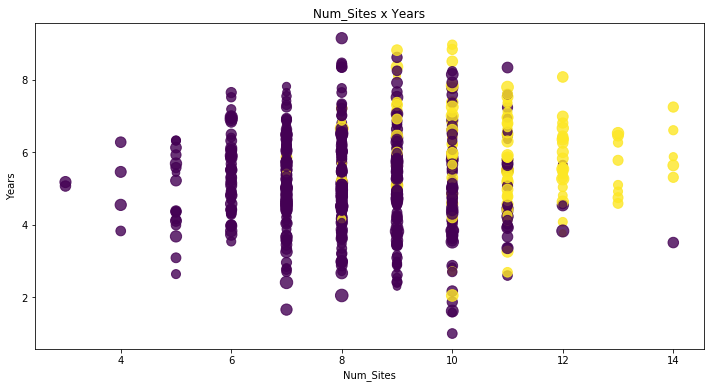

In [12]:
purchase = df["Total_Purchase"] / 100
plt.figure(figsize=(12,6))
plt.scatter(df["Num_Sites"],df["Years"],c=df["Churn"],s=purchase,alpha=.8)
plt.title("Num_Sites x Years")
plt.ylabel("Years")
plt.xlabel("Num_Sites")
plt.show()

- higher value of num_sites has more intensity to churn

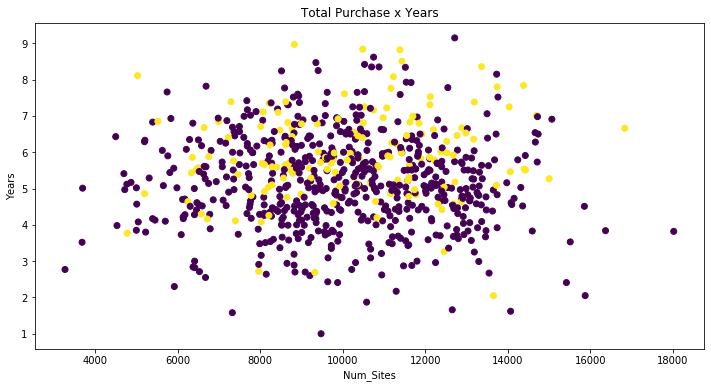

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df["Total_Purchase"],df["Years"],c=df["Churn"])
plt.title("Total Purchase x Years")
plt.ylabel("Years")
plt.xlabel("Num_Sites")
plt.show()

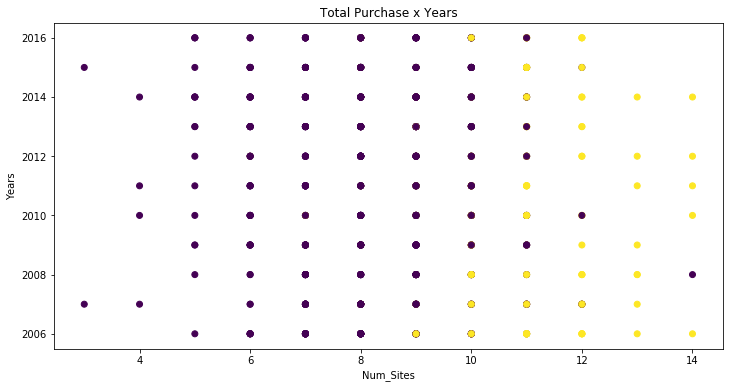

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(df["Num_Sites"],df["Onboard_date"],c=df["Churn"])
plt.title("Total Purchase x Years")
plt.ylabel("Years")
plt.xlabel("Num_Sites")
plt.show()

- value 10 of higer on numsites has more intend to be churn

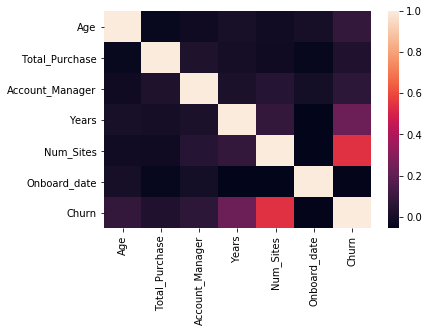

In [15]:
sns.heatmap(df.corr())

### normalize and spliting dataset

In [16]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [17]:
from sklearn.preprocessing import normalize

In [18]:
x_norm = normalize(x,norm="l1")

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y)

### creating model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
sv = SVC()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

model = [lr,dt,sv,rf,kn]
model_name = {lr:"Logistic Regression", rf:"Random Forest", kn:"KNN",sv:"SVC",dt:"Decision Tree"}

In [22]:
for i in model:
    i.fit(x_train,y_train)
    print(model_name[i],"score:",i.score(x_test,y_test))

Logistic Regression score: 0.7712765957446809
Decision Tree score: 0.7446808510638298
SVC score: 0.7712765957446809
Random Forest score: 0.824468085106383
KNN score: 0.7287234042553191


- Random Forest is top performers

### evaluating model

In [90]:
from sklearn.metrics import classification_report, plot_precision_recall_curve,plot_confusion_matrix,plot_roc_curve,f1_score,confusion_matrix

In [24]:
for i in model:
    y_pred = i.predict(x_test)
    print(model_name[i])
    print(classification_report(y_test,y_pred))
    print("="*70)

Logistic Regression
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       145
           1       0.00      0.00      0.00        43

    accuracy                           0.77       188
   macro avg       0.39      0.50      0.44       188
weighted avg       0.59      0.77      0.67       188

Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       145
           1       0.44      0.42      0.43        43

    accuracy                           0.74       188
   macro avg       0.63      0.63      0.63       188
weighted avg       0.74      0.74      0.74       188

SVC
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       145
           1       0.00      0.00      0.00        43

    accuracy                           0.77       188
   macro avg       0.39      0.50      0.44       188
weighted avg       0.59      0.77   

C:\Users\bima\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bima\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
for i in model:
    y_pred = i.predict(x_test)
    print(model_name[i])
    print(f1_score(y_test,y_pred))
    print("="*70)

Logistic Regression
0.0
Decision Tree
0.4285714285714286
SVC
0.0
Random Forest
0.5074626865671642
KNN
0.10526315789473685


- if we looking for the accuracy most of the model is excelent but if when we look in __f1-score__ most of model is __terible__. except Decision Tree.
- because imbalance dataset model difficult to recognize minor values

Logistic Regression


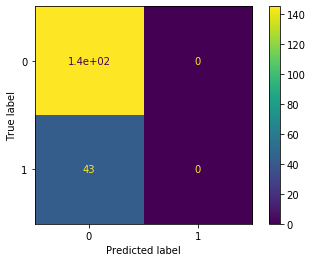

Decision Tree


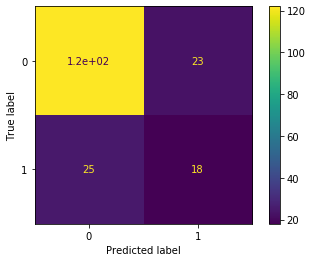

SVC


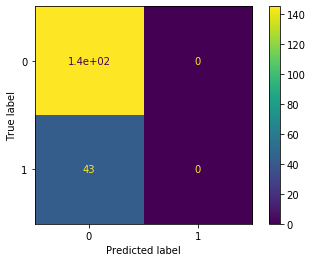

Random Forest


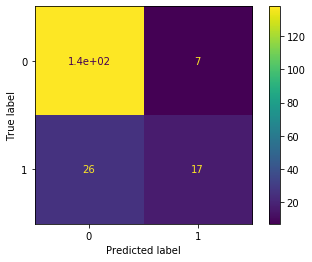

KNN


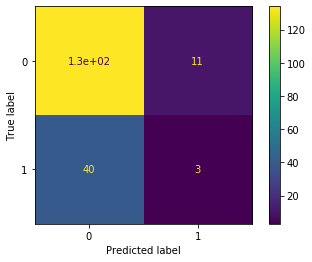

In [26]:
for i in model:
    y_pred = i.predict(x_test)
    print(model_name[i])
    print(plot_confusion_matrix(i,x_test,y_test))
    print("="*70)
    plt.show()

### Handling imbalance target

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_std = scaler.fit_transform(x)
y = y 

#### SMOTE

In [65]:
sm = SMOTE()
x_sm,y_sm = sm.fit_sample(x_std,y)

In [69]:
y_sm.value_counts()

1    604
0    604
Name: Churn, dtype: int64

In [72]:
xsm_tr, xsm_ts, ysm_tr, ysm_ts = train_test_split(x_sm,y_sm) 

In [98]:
# Create model with x and y train that has been smote
for i in model:
    i.fit(xsm_tr,ysm_tr)
    print(model_name[i],"R2 score:",i.score(xsm_ts,ysm_ts))

Logistic Regression R2 score: 0.8311258278145696
Decision Tree R2 score: 0.8675496688741722
SVC R2 score: 0.8576158940397351
Random Forest R2 score: 0.9105960264900662
KNN R2 score: 0.8741721854304636


In [95]:
print("F1 Skor model SMOTE")
print("")
for i in model:
    ysm_pred = i.predict(xsm_ts)
    print(model_name[i])
    print(f1_score(ysm_ts, ysm_pred))
    print("="*70)

F1 Skor model SMOTE

Logistic Regression
0.823529411764706
Decision Tree
0.875
SVC
0.8522336769759451
Random Forest
0.9160839160839161
KNN
0.8782051282051282


In [97]:
print("Confussion Matrix SMOTE")
print("")
for i in model:
    y_pred = i.predict(xsm_ts)
    print(model_name[i])
    print(confusion_matrix(y_pred,ysm_ts))
    print("="*70)
    plt.show()

Confussion Matrix SMOTE

Logistic Regression
[[132  22]
 [ 29 119]]
Decision Tree
[[140  15]
 [ 21 126]]
SVC
[[135  17]
 [ 26 124]]
Random Forest
[[147  10]
 [ 14 131]]
KNN
[[127   4]
 [ 34 137]]


#### Nearmiss

In [79]:
xst_train, xst_test, yst_train, yst_test = train_test_split(x_std,y) # only need x_test for validating

In [80]:
nm = NearMiss()
x_nm,y_nm = nm.fit_sample(x_std,y)

In [81]:
y_nm.value_counts()

1    146
0    146
Name: Churn, dtype: int64

In [82]:
xnm_tr, xnm_ts, ynm_tr, ynm_ts = train_test_split(x_nm,y_nm) 

In [87]:
# Create model with x and y train that has been Nearmiss
for i in model:
    i.fit(xnm_tr,ynm_tr)
    print(model_name[i],"score:",i.score(xnm_ts,ynm_ts))

Logistic Regression score: 0.8670212765957447
Decision Tree score: 0.7659574468085106
SVC score: 0.6861702127659575
Random Forest score: 0.7606382978723404
KNN score: 0.8297872340425532


In [85]:
for i in model:
    ynm_pred = i.predict(xnm_ts)
    print(model_name[i])
    print(f1_score(ynm_ts, ynm_pred))
    print("="*70)

Logistic Regression
0.7894736842105263
Decision Tree
0.6478873239436619
SVC
0.8285714285714285
Random Forest
0.8000000000000002
KNN
0.7272727272727273


In [93]:
for i in model:
    y_pred = i.predict(xnm_ts)
    print(model_name[i])
    print(confusion_matrix(y_pred,ynm_ts))
    print("="*70)
    plt.show()

Logistic Regression
[[19  6]
 [17 31]]
Decision Tree
[[30  1]
 [ 6 36]]
SVC
[[21  5]
 [15 32]]
Random Forest
[[32  0]
 [ 4 37]]
KNN
[[19  1]
 [17 36]]


### Evaluating SMOTE model on dataset
- model with SMOTE dataset choosed because has higher F1 Score

In [99]:
xst_train,xst_test,yst_train,yst_test = train_test_split(x_std,y) # only need x_test for testing

In [100]:
for i in model:
    i.fit(xsm_tr,ysm_tr)

In [101]:
print("F1 Skor model SMOTE")
print("")
for i in model:
    ysm_pred = i.predict(xst_test)
    print(model_name[i])
    print(f1_score(yst_test, ysm_pred))
    print("="*70)

F1 Skor model SMOTE

Logistic Regression
0.6666666666666667
Decision Tree
0.918918918918919
SVC
0.7441860465116279
Random Forest
0.9589041095890412
KNN
0.7021276595744681


- __Random Forest__ model is top performers

### Predict Test Data

In [114]:
df_test = pd.read_csv("test.csv")
df_test.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Anna Bryant,39,8801.86,1,4.43,10,2007-03-18 11:14:44,30668 Isabella Freeway Suite 428 Lake Kellyhav...,Bennett Inc
1,Chris Sutton,37,10314.67,1,5.86,8,2016-06-22 19:20:04,"858 Booth Points South Davidside, AZ 92136-1145",Collins Ltd


In [115]:
# check null values
df_test.isna().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
dtype: int64

In [116]:
# Drop unused columns
df_test_d = df_test.drop(["Company","Location","Names"], axis=1)

In [117]:
df_test_d["Onboard_date"] = df_test_d["Onboard_date"].apply(lambda x:int(x[:4])) #takes only year date

In [118]:
scaler = StandardScaler()
x_test = scaler.fit_transform(df_test_d)

In [119]:
df_test["Churn Predict"] = rf.predict(x_test)

In [120]:
df_test

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn Predict
0,Anna Bryant,39,8801.86,1,4.43,10,2007-03-18 11:14:44,30668 Isabella Freeway Suite 428 Lake Kellyhav...,Bennett Inc,1
1,Chris Sutton,37,10314.67,1,5.86,8,2016-06-22 19:20:04,"858 Booth Points South Davidside, AZ 92136-1145",Collins Ltd,0
2,Connie Golden,39,10268.87,1,3.68,6,2009-08-19 18:52:21,"3324 Gomez Knolls Suite 591 Farmerchester, LA ...",Brown-Wagner,0
3,Dennis Morgan,43,8042.76,0,4.95,8,2006-04-29 20:25:59,"00103 Jeffrey Crest Apt. 205 Padillaville, IA ...","Barry, Jordan and Hall",0
4,Erin Gilbert,35,12357.31,0,5.03,10,2014-08-06 19:11:10,"7098 Vicki Lane Suite 339 South Dominic, NM 43...","Ware, Williams and Hill",0
5,Jason Taylor,46,5570.45,0,2.23,7,2012-05-01 06:20:54,"693 Kevin Groves Apt. 158 Debramouth, NV 73809","Moore, Nichols and Miller",0
6,Kenneth Alexander,30,8403.78,1,4.13,7,2006-06-28 09:26:57,"032 Jorge Trail Apt. 091 Brianmouth, ID 23964",Torres Inc,0
7,Michael Williams,35,15571.26,0,6.45,9,2011-12-02 20:13:49,"5728 Michael Rue Riosland, NY 38804-1415",Petty and Sons,1
8,Penny Perez,44,10309.15,1,6.35,9,2006-01-10 18:04:20,725 Stephanie Springs Apt. 350 South Brianbury...,Davis-Travis,1
9,Rachel Cherry,52,9782.83,0,3.96,7,2012-04-17 10:47:29,"3479 Stewart Way Sandersside, ID 69317-8759","Bishop, Tran and Pope",0


### Store model 

In [121]:
import joblib

In [122]:
joblib.dump(rf,"churn.sav")

['churn.sav']